<h2 align="center" style="font-weight:bold;">Startup Success or Failure Analysis</h2>
<h2 align="center" style="font-weight:bold;">Davit Davtyan</h2>

## **Introduction**

##### Let's dive into a dataset of 472 startups to figure out why some succeed and others don't. It's like detective work, but for the business world.

##### The primary objective of this analysis is to identify and understand the underlying factors that lead to the success or failure of startup companies. By the implementation of machine learning algorithms and statistical analysis methods, I want to highlight the key indicators of startup outcomes. This is about uncovering the secrets of success for new companies. By figuring this out, I can help future entrepreneurs, investors, and maybe even improve the economy a bit. 
##### **So, let's get started!**

# **Stage 1: Data Investigation**
 - ##### **Objective:** Prepare the dataset for analysis by understanding the features, their relationships, and considering that I'm not going to use all the features, data preparation and cleaning will happen for each segment that are defined in the **Stage 2**.

##### **Import Libraries**

In [476]:
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

##### **Load Data**

In [85]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data = data.replace('No Info', np.nan)
print(data.head())
print("***********************************")
print(data.dtypes)

  Company_Name Dependent-Company Status year of founding  \
0     Company1                  Success              NaN   
1     Company2                  Success             2011   
2     Company3                  Success             2011   
3     Company4                  Success             2009   
4     Company5                  Success             2010   

  Age of company in years  Internet Activity Score  \
0                     NaN                     -1.0   
1                       3                    125.0   
2                       3                    455.0   
3                       5                    -99.0   
4                       4                    496.0   

     Short Description of company profile  \
0                      Video distribution   
1                                     NaN   
2                Event Data Analytics API   
3  The most advanced analytics for mobile   
4   The Location-Based Marketing Platform   

                              Industry of c

In [86]:
dictionary = pd.read_csv('dictionary.csv', encoding='ISO-8859-1')
print(dictionary.head())

                   Variable                                        Description
0              Company_Name                                                NaN
1  Dependent-Company Status  Dependent variable indicating if company succe...
2          year of founding                                                NaN
3   Age of company in years                                                NaN
4   Internet Activity Score        How much company is acgtive on social media


##### **Initial Data Exploration**

In [87]:
print(data.info())
print("***********************************")
print(dictionary.info())
print("***********************************")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB
None
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     116 non-null    object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB
None
***********************************
       Internet Activity Score  Employee Count  Employees count MoM change  \
count               407.000000      306.000000                  267.000000   
mean                114.159705       31.408497                   -1.299625   
std                 225.651419       62.673600                   23.967085   
min                -725.000000        0.000000                 -100.000000   
25%                  -3.500000 

# **Stage 2: Segmentation**

##### Main Objective: Segmenting the analysis into several groups of features, each focusing on different aspects of understanding a company's success or failure, I believe makes the analysis more manageable and sensible as each segment tells its own story about what factors might contribute to success or failure. 

##### Startups are influenced by a wide variety of factors ranging from financials to team dynamics. Thus, analyzing these areas separately prevents the model from becoming overwhelmingly complex and allows for the isolation of effects, which I believe makes it easier to understand how different aspects contribute to the overall performance. As when too many features are included in a model, there is a risk of introducing noise that can disrupt meaningful patterns.

##### Different stakeholders might be interested in different aspects of a startup's potential for success. For example, investors may focus on financial indicators, while founders may be more concerned with the impact of their team's composition. In this sense, segmentation allows for targeted analysis that can be interpretable for these varied interests.

##### Segmenting the analysis can lead to more specific and actionable recommendations. If a particular group of features is found to strongly influence startup success, stakeholders can focus their efforts on improving those areas.

##### So, the following groups can be analyzed independently to uncover insights and correlations with startup success or failure.

### **2.1 Company Fundamentals**
- **Dependent-Company Status**
- **year of founding**
- **Age of company in years**
- **Industry of company**
- **Short Description of company profile**
- **Country of company**
- **Continent of company**

### **2.2 Financial and Investment Information**
- **Dependent-Company Status**
- **Last Funding Date**
- **Last Funding Amount**
- **Number of Investors in Seed**
- **Number of Investors in Angel and or VC**
- **Presence of a top angel or venture fund in previous round of investment**
- **Number of of repeat investors**

### **2.3 Market Presence and Strategy**
- **Dependent-Company Status**
- **Internet Activity Score**
- **Focus functions of company**
- **B2C or B2B venture?**
- **Subscription based business**
- **Local or global player**
- **Linear or Non-linear business model**
- **Hyper localisation**
- **Disruptiveness of technology**

### **2.4 Product and Technology**
- **Dependent-Company Status**
- **Product or service company?**
- **Cloud or platform based serive/product?**
- **Machine Learning based business**
- **Predictive Analytics business**
- **Speech analytics business**
- **Prescriptive analytics business**
- **Big Data Business**
- **Cross-Channel Analytics/ marketing channels**

### **2.5 Operational Efficiency and Model**
- **Dependent-Company Status**
- **Capital intensive business**
- **Crowdsourcing based business**
- **Crowdfunding based business**
- **Time to market service or product**
- **Pricing Strategy**
- **Proprietary or patent position (competitive position)**
- **Cross-Channel Analytics/ marketing channels**
- **Barriers of entry for the competitors**

### **2.6 Founder and Team**
- **Dependent-Company Status**
- **Number of Investors in Seed**
- **Number of Investors in Angel and or VC**
- **Number of Co-founders**
- **Number of of advisors**
- **Team size Senior leadership**
- **Team size all employees**
- **Has the team size grown**
- **Renown score**
- **Average Years of experience for founder and co founder**
- **Highest education**
- **Years of education**
- **Number of Recognitions for Founders and Co-founders**
- **Worked in top companies**
- **Average size of companies worked for in the past**
- **Have been part of startups in the past?**
- **Was he or she partner in Big 5 consulting?**
- **Consulting experience?**
- **Team Composition score**

### **Let's get started!**

## **2.1 Company Fundamentals**

In [91]:
company_fundamentals = data[['Dependent-Company Status', 'Company_Name', 'year of founding', 'Age of company in years', 
                             'Industry of company', 'Short Description of company profile', 'Country of company', 
                             'Continent of company']]

company_fundamentals

,Dependent-Company Status,Company_Name,year of founding,Age of company in years,Industry of company,Short Description of company profile,Country of company,Continent of company
0,Success,Company1,NaN,NaN,NaN,Video distribution,United States,North America
1,Success,Company2,2011,3,Market Research|Marketing|Crowdfunding,NaN,United States,North America
2,Success,Company3,2011,3,Analytics|Cloud Computing|Software Development,Event Data Analytics API,United States,North America
3,Success,Company4,2009,5,Mobile|Analytics,The most advanced analytics for mobile,United States,North America
4,Success,Company5,2010,4,Analytics|Marketing|Enterprise Software,The Location-Based Marketing Platform,United States,North America
...,...,...,...,...,...,...,...,...
467,Failed,Company468,2011,3,E-Commerce,BtoB deal site,United States,North America
468,Failed,Company469,NaN,NaN,NaN,NaN,NaN,NaN
469,Failed,Company470,2010,4,Analytics|E-Commerce,Real Time Social Media Analytics,United States,North America
470,Failed,Company471,2009,5,Analytics|Marketing,Social Media Publishing and Analytics,United States,North America


In [95]:
company_fundamentals.isnull().sum()
group_1 = company_fundamentals.copy()

##### Considering that there are cases where `Industry of company` is missing, but a `Short Description of company profile` is available, I decided to do **data augmentation** using three different NLP models. They were employed for a zero-shot classification task, which is a technique for making predictions on data not seen during the model's training.

##### Zero-shot learning models have been pre-trained on vast amounts of text data and have acquired a broad understanding of natural language. These models can be applied to classify text into categories they haven't been explicitly trained on, which is really useful for filling in missing information of `Industry of company` classification without the need for additional training data.

##### For that, unique industry labels are extracted from the `Industry of company` to provide candidate labels for the classification task, which has more than one industry associated to each company. So, this approach kind of ensures that the predictions are done to the specific context of the data.

##### **NLP Workflow**

In [96]:
pipelines = {
    "model_1": pipeline("zero-shot-classification", model="facebook/bart-large-mnli"),
    "model_2": pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli"),
    "model_3": pipeline("zero-shot-classification", model="roberta-large-mnli")
}

unique_industries_combined = group_1['Industry of company'].dropna().unique()
unique_industries = list(set([item for sublist in [i.split('|') for i in unique_industries_combined] for item in sublist]))

# Filter rows where 'Industry of company' is NaN and 'Short Description of company profile' is not NaN
filtered_data = group_1[group_1['Industry of company'].isnull() & group_1['Short Description of company profile'].notnull()]

# Classify only the filtered descriptions
for index, row in filtered_data.iterrows():
    company_description = row['Short Description of company profile']
    
    highest_score = 0
    best_label = None
    for model_pipeline in pipelines.values():
        result = model_pipeline(company_description, unique_industries)
        # Check if this model's best score is higher than the previous models
        if result["scores"][0] > highest_score:
            highest_score = result["scores"][0]
            best_label = result["labels"][0]
        
    print(f"Description: {company_description}")
    print(f"Predicted Industry: {best_label} (Score: {highest_score})")
    print("---")
    
    # Update the DataFrame with the best predicted industry
    if best_label is not None:
        group_1.at[index, 'Industry of company'] = best_label

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the

Description: Video distribution
Predicted Industry: Media (Score: 0.8899814486503601)
---
Description: water management solutions
Predicted Industry: Deals (Score: 0.2871896028518677)
---
Description: Social Business Analytics
Predicted Industry: analytics (Score: 0.5676801204681396)
---
Description: Semantic Automation and Storytelling
Predicted Industry: Analytics (Score: 0.4293705224990845)
---
Description: Global multimedia content platform
Predicted Industry: Media (Score: 0.5457239747047424)
---
Description: Smart Suggestions for Sales Reps
Predicted Industry: Career / Job Search (Score: 0.20975737273693085)
---
Description: Analytics, e-commerce, Consumer Finance
Predicted Industry: analytics (Score: 0.37183892726898193)
---
Description: Enterprise Marketing Intelligence
Predicted Industry: Marketing (Score: 0.49271559715270996)
---
Description: User generated interest graphs
Predicted Industry: Deals (Score: 0.09626950323581696)
---
Description: technology-enabled electronic pa

In [98]:
group_1.isnull().sum()

Dependent-Company Status                  0
Company_Name                              0
year of founding                         59
Age of company in years                  59
Industry of company                      80
Short Description of company profile    149
Country of company                       71
Continent of company                     71
dtype: int64

In [99]:
group_1 = group_1.dropna(subset=['year of founding', 'Age of company in years', 
                                'Country of company', 'Continent of company', 'Industry of company'])

group_1 = group_1.drop(columns=['Short Description of company profile'])

In [100]:
print(group_1.isnull().sum())
print(group_1.info())

Dependent-Company Status    0
Company_Name                0
year of founding            0
Age of company in years     0
Industry of company         0
Country of company          0
Continent of company        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 1 to 471
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dependent-Company Status  364 non-null    object
 1   Company_Name              364 non-null    object
 2   year of founding          364 non-null    object
 3   Age of company in years   364 non-null    object
 4   Industry of company       364 non-null    object
 5   Country of company        364 non-null    object
 6   Continent of company      364 non-null    object
dtypes: object(7)
memory usage: 22.8+ KB
None


##### **Convert 'year of founding' and 'Age of company in years' to numeric types**

In [101]:
group_1['year of founding'] = pd.to_numeric(group_1['year of founding'], errors='coerce')
group_1['Age of company in years'] = pd.to_numeric(group_1['Age of company in years'], errors='coerce')
print(group_1.dtypes)

Dependent-Company Status    object
Company_Name                object
year of founding             int64
Age of company in years      int64
Industry of company         object
Country of company          object
Continent of company        object
dtype: object


##### **Define numerical and categorical columns**

In [102]:
categorical_cols = group_1.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Dependent-Company Status')

numerical_cols = group_1.select_dtypes(include=['int64']).columns.tolist()

##### **Define the target variable and remove the target variable from the dataset**

In [103]:
target = group_1['Dependent-Company Status']
group_1 = group_1.drop('Dependent-Company Status', axis=1)

In [105]:
group_1

,Company_Name,year of founding,Age of company in years,Industry of company,Country of company,Continent of company
1,Company2,2011,3,Market Research|Marketing|Crowdfunding,United States,North America
2,Company3,2011,3,Analytics|Cloud Computing|Software Development,United States,North America
3,Company4,2009,5,Mobile|Analytics,United States,North America
4,Company5,2010,4,Analytics|Marketing|Enterprise Software,United States,North America
5,Company6,2010,4,Food & Beverages|Hospitality,United States,North America
...,...,...,...,...,...,...
466,Company467,2006,8,E-Commerce,United States,North America
467,Company468,2011,3,E-Commerce,United States,North America
469,Company470,2010,4,Analytics|E-Commerce,United States,North America
470,Company471,2009,5,Analytics|Marketing,United States,North America


##### **Split 'Industry of company' into lists of industries by MultiLabelBinarizer**
##### By doing this, I try addressing the 'Industry of company' feature where multiple industries for a company are kept in single column separated by a pipe ('|').

In [106]:
group_1['Industry of company'] = group_1['Industry of company'].apply(lambda x: x.split('|') if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()

# Fit and transform the 'Industry of company' to binary form
industry_binarized = mlb.fit_transform(group_1['Industry of company'])

industry_df = pd.DataFrame(industry_binarized, columns=mlb.classes_, index=group_1.index)

for column in industry_df.columns:
    group_1[column] = industry_df[column]

group_1 = group_1.drop(columns=['Industry of company'])

In [107]:
group_1

,Company_Name,year of founding,Age of company in years,Country of company,Continent of company,Advertising,Analytics,Career / Job Search,Classifieds,CleanTech,...,Retail,Search,Security,Social Networking,Software Development,Telecommunications,Transportation,Travel,analytics,energy
1,Company2,2011,3,United States,North America,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Company3,2011,3,United States,North America,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Company4,2009,5,United States,North America,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Company5,2010,4,United States,North America,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Company6,2010,4,United States,North America,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Company467,2006,8,United States,North America,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,Company468,2011,3,United States,North America,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,Company470,2010,4,United States,North America,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,Company471,2009,5,United States,North America,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### **Apply OneHotEncoder to the categorical columns**

In [108]:
ohe = OneHotEncoder(drop='first')

encoded_features = ohe.fit_transform(group_1[['Country of company', 'Continent of company']])

encoded_df = pd.DataFrame(encoded_features.toarray(), 
                          columns=ohe.get_feature_names_out(), 
                          index=group_1.index)  # Keep the original index

group_1 = group_1.join(encoded_df)

group_1.drop(['Country of company', 'Continent of company'], axis=1, inplace=True)

In [109]:
group_1

,Company_Name,year of founding,Age of company in years,Advertising,Analytics,Career / Job Search,Classifieds,CleanTech,Cloud Computing,Crowdfunding,...,Country of company_Russian Federation,Country of company_Singapore,Country of company_Spain,Country of company_Sweden,Country of company_Switzerland,Country of company_United Kingdom,Country of company_United States,Continent of company_Europe,Continent of company_North America,Continent of company_South America
1,Company2,2011,3,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Company3,2011,3,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Company4,2009,5,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Company5,2010,4,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,Company6,2010,4,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Company467,2006,8,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
467,Company468,2011,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
469,Company470,2010,4,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
470,Company471,2009,5,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


##### **Apply label encoding for the target feature (success/failed)**

In [110]:
le = LabelEncoder()
target_encoded = le.fit_transform(target)

X = group_1.drop(columns=['Company_Name'])

##### **ML workflow: Training and evaluating models**

##### The use of the following models helps to cover a range of potential data relationships, from simple to complex interactions. The ROC AUC score is used here as it provides a measure of a model’s ability to distinguish between the two classes across different thresholds, with balancing both the true positive rate (sensitivity) and the false positive rate (1-specificity).

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Evaluation of {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Calculate ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc}")
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_scores)
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    
    model_performance[model_name] = roc_auc

Training Decision Tree...
Evaluation of Decision Tree:
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        19
           1       0.88      0.78      0.82        54

    accuracy                           0.75        73
   macro avg       0.70      0.73      0.71        73
weighted avg       0.78      0.75      0.76        73

ROC AUC Score: 0.7436647173489279
Training Random Forest...
Evaluation of Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.42      0.52        19
           1       0.82      0.93      0.87        54

    accuracy                           0.79        73
   macro avg       0.74      0.67      0.69        73
weighted avg       0.78      0.79      0.78        73

ROC AUC Score: 0.8245614035087719
Training Gradient Boosting...
Evaluation of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.54      0.37      0.44       

##### **Identify the best model based on ROC AUC score, and do hyperparameter tuning for the best model**

In [116]:
best_model_name = max(model_performance, key=model_performance.get)
print(f"Best model based on ROC AUC score is: {best_model_name} with score: {model_performance[best_model_name]}")

if best_model_name == 'Random Forest':
    parameters = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    clf = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, scoring='roc_auc')
elif best_model_name == 'Decision Tree':
    parameters = {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=5, scoring='roc_auc')
elif best_model_name == 'Gradient Boosting':
    parameters = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    clf = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=5, scoring='roc_auc')

clf.fit(X_train, y_train)

print("Best parameters found:", clf.best_params_)
print("Best ROC AUC score found:", clf.best_score_)

Best model based on ROC AUC score is: Random Forest with score: 0.8245614035087719
Best parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
Best ROC AUC score found: 0.8368140919158362


In [117]:
best_model = clf.best_estimator_

feature_importances = best_model.feature_importances_

feature_names = X.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                         Feature  Importance
3                      Analytics    0.224642
0               year of founding    0.116237
1        Age of company in years    0.110038
37          Software Development    0.029490
25                     Marketing    0.027600
..                           ...         ...
58  Country of company_Singapore    0.000000
32                   Real Estate    0.000000
39                Transportation    0.000000
40                        Travel    0.000000
8                   Crowdfunding    0.000000

[67 rows x 2 columns]


C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\2679229174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette="viridis")


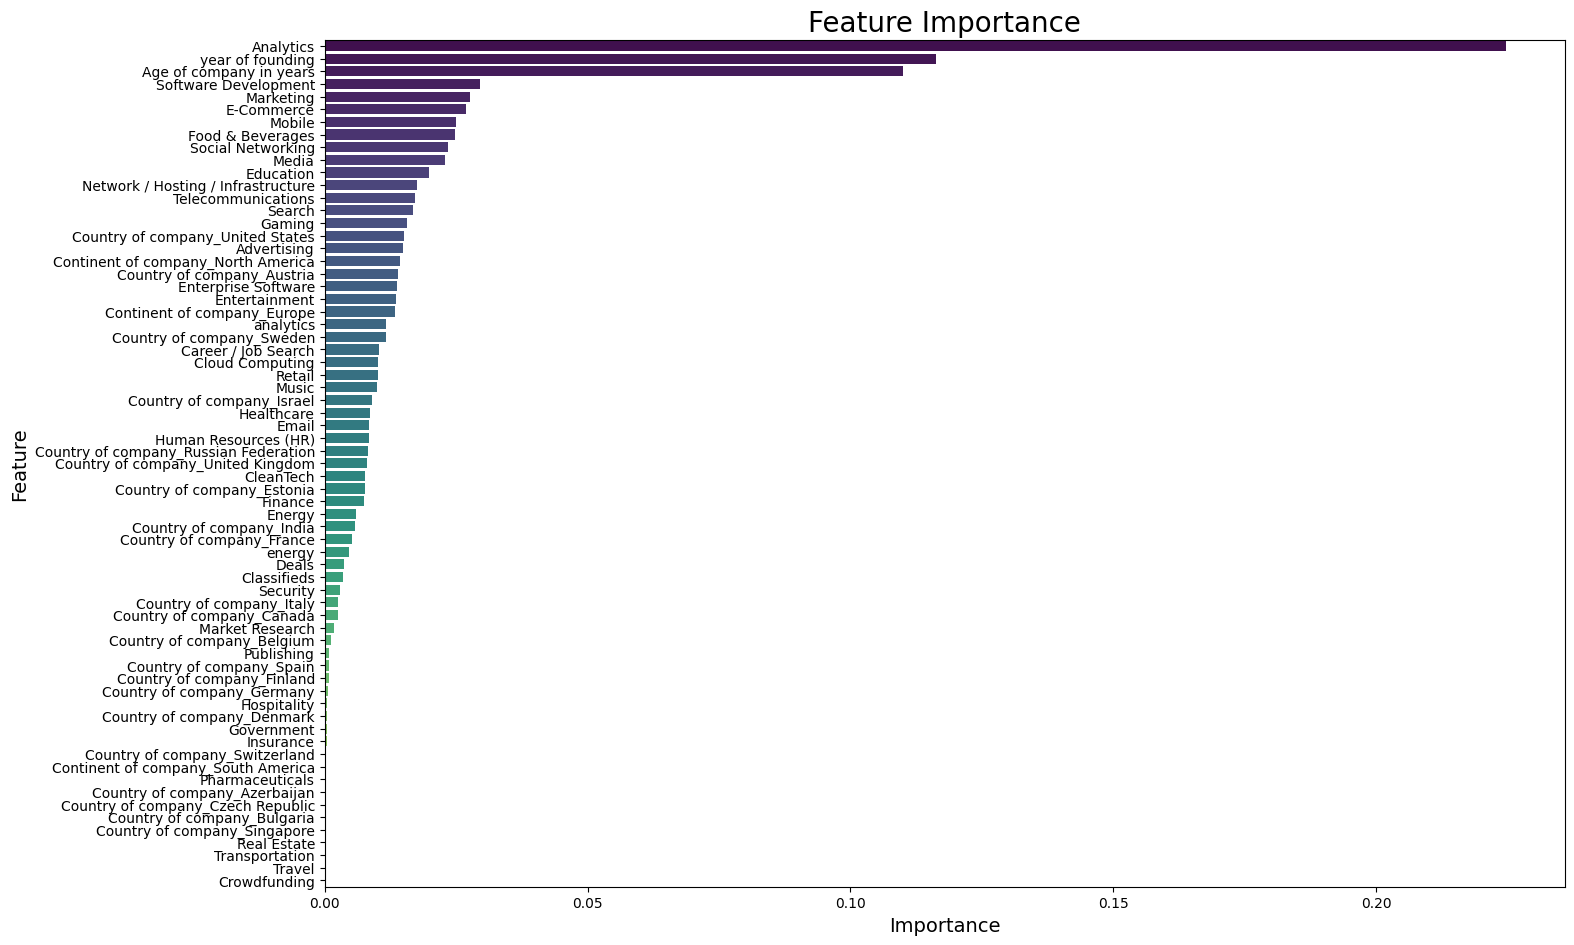

In [123]:
plt.figure(figsize=(16, 11))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette="viridis")
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

##### Summary
- The `MultiLabelBinarizer` was used to encode the `Industry of company` feature, resulting in a separate feature for each industry. The feature importances suggest that certain industries ('Analytics', 'Software Development', 'Marketing') are more influential in predicting the success or failure of a company compared to others.

- Similarly, the `Country of company` and `Continent of company` features were one-hot-encoded, leading to individual binary features for each country and continent. The feature importances for these suggest that certain countries or continents may be more associated with company success or failure than others.

- For the top features the model most likely found patterns in the data that suggest companies involved in analytics, or those with a certain age or founding year, have some distinct outcomes in terms of success or failure.

- Anyway, I think while feature importances provide a useful guide, they are not definitive proof of causality.

## **2.2 Financial and Investment Information**

In [221]:
financial_data = data[['Dependent-Company Status',
                       'Last Funding Date',
                       'Last Funding Amount', 
                       'Number of Investors in Seed', 
                       'Number of Investors in Angel and or VC', 
                       'Presence of a top angel or venture fund in previous round of investment', 
                       'Number of of repeat investors', 
]]

financial_data

,Dependent-Company Status,Last Funding Date,Last Funding Amount,Number of Investors in Seed,Number of Investors in Angel and or VC,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors
0,Success,5/26/2013,450000.0,2,0,Yes,4
1,Success,NaN,NaN,5,0,No,0
2,Success,10/23/2013,2350000.0,15,0,No,0
3,Success,5/10/2012,10250000.0,6,0,Yes,0
4,Success,12/11/2013,5500000.0,7,0,No,0
...,...,...,...,...,...,...,...
467,Failed,NaN,NaN,0,0,No,0
468,Failed,NaN,NaN,0,4,No,0
469,Failed,NaN,NaN,NaN,NaN,NaN,NaN
470,Failed,2/1/2010,100000.0,NaN,NaN,NaN,NaN


In [222]:
financial_data.isnull().sum()

Dependent-Company Status                                                     0
Last Funding Date                                                          122
Last Funding Amount                                                        160
Number of Investors in Seed                                                 49
Number of Investors in Angel and or VC                                      49
Presence of a top angel or venture fund in previous round of investment     97
Number of of repeat investors                                               40
dtype: int64

##### **Keeping only the year part of `Last Funding Date`, dealing with categorical features**

In [223]:
financial_data['Last Funding Date'] = pd.to_datetime(financial_data['Last Funding Date']).dt.year

numeric_cols = ['Number of Investors in Seed', 'Number of Investors in Angel and or VC', 'Number of of repeat investors']
for col in numeric_cols:
    financial_data[col] = pd.to_numeric(financial_data[col], errors='coerce')

financial_data['Presence of a top angel or venture fund in previous round of investment'] = financial_data['Presence of a top angel or venture fund in previous round of investment'].map({'Yes': 1, 'No': 0})

C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\3755771498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_data['Last Funding Date'] = pd.to_datetime(financial_data['Last Funding Date']).dt.year
C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\3755771498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_data[col] = pd.to_numeric(financial_data[col], errors='coerce')
C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\3755771498.py:7: SettingWithCopyWarning: 
A

In [224]:
financial_data = financial_data.dropna(subset=[
    'Last Funding Date',
    'Last Funding Amount',
    'Number of Investors in Seed',
    'Number of Investors in Angel and or VC',
    'Presence of a top angel or venture fund in previous round of investment',
    'Number of of repeat investors'
])

In [230]:
le = LabelEncoder()
target_encoded = le.fit_transform(financial_data['Dependent-Company Status'])

X = financial_data.drop(columns=['Dependent-Company Status'])
y = target_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Evaluation of {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Calculate ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc}")
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_scores)
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    
    model_performance[model_name] = roc_auc

Training Decision Tree...
Evaluation of Decision Tree:
              precision    recall  f1-score   support

           0       0.37      0.56      0.44        18
           1       0.84      0.71      0.77        58

    accuracy                           0.67        76
   macro avg       0.60      0.63      0.61        76
weighted avg       0.73      0.67      0.69        76

ROC AUC Score: 0.6312260536398467
Training Random Forest...
Evaluation of Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        18
           1       0.86      0.83      0.84        58

    accuracy                           0.76        76
   macro avg       0.68      0.69      0.68        76
weighted avg       0.77      0.76      0.77        76

ROC AUC Score: 0.7140804597701149
Training Gradient Boosting...
Evaluation of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       

In [231]:
best_model_name = max(model_performance, key=model_performance.get)
print(f"Best model based on ROC AUC score is: {best_model_name} with score: {model_performance[best_model_name]}")

if best_model_name == 'Random Forest':
    parameters = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    clf = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, scoring='roc_auc')
elif best_model_name == 'Decision Tree':
    parameters = {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=5, scoring='roc_auc')
elif best_model_name == 'Gradient Boosting':
    parameters = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    clf = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=5, scoring='roc_auc')

clf.fit(X_train, y_train)

print("Best parameters found:", clf.best_params_)
print("Best ROC AUC score found:", clf.best_score_)

Best model based on ROC AUC score is: Gradient Boosting with score: 0.7193486590038314
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best ROC AUC score found: 0.8078347578347579


In [232]:
best_model = clf.best_estimator_

feature_importances = best_model.feature_importances_

feature_names = X.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                                             Feature  Importance
0                                  Last Funding Date    0.605367
1                                Last Funding Amount    0.183480
3             Number of Investors in Angel and or VC    0.095136
5                      Number of of repeat investors    0.063286
2                        Number of Investors in Seed    0.045743
4  Presence of a top angel or venture fund in pre...    0.006988


C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\967983751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette="viridis")


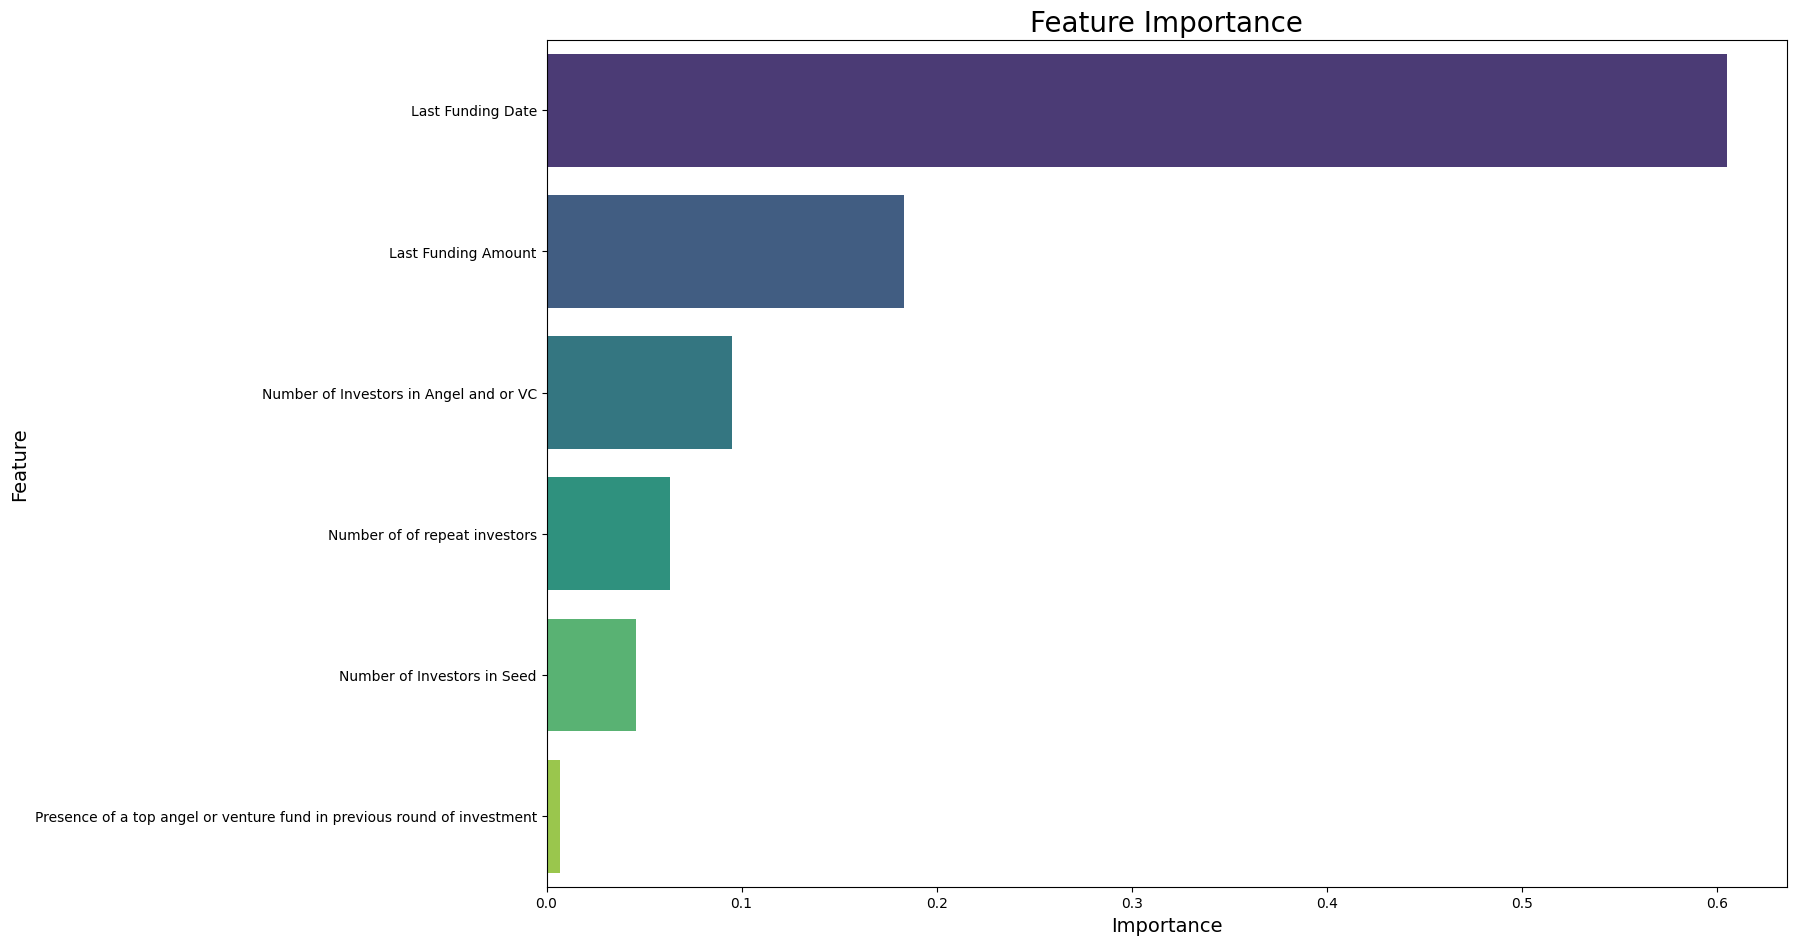

In [233]:
plt.figure(figsize=(16, 11))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette="viridis")
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

#### Summary
- **Last Funding Date** seems to be the most important feature in predicting startup success in this particular model. This might suggest that the timing of the last funding round could be significant, perhaps due to market conditions at the time or the growth phase of the company.

- **Last Funding Amount** is the next important feature. Maybe the amount of money a startup has been able to raise in its last round of funding is good predictor of its success, which could reflect the startup's ability to kind of secure necessary capital for expansion or survival.

- The number of investors in different funding rounds (Seed, Angel/VC) and the number of repeat investors seem to have some minor importance. This could possibly mean that while the presence and confidence of investors are relevant, they are not as critical as the more direct financial measures.

- I can infer that financial stability and growth potential (indicated by recent funding success) may be more influential on the success of the company than the involvement of the investors.

## **2.3 Market Presence and Strategy**

In [374]:
market_data = data[[
    'Dependent-Company Status',
    'Internet Activity Score', 
    'Focus functions of company', 
    'B2C or B2B venture?', 
    'Subscription based business', 
    'Local or global player',
    'Linear or Non-linear business model', 
    'Hyper localisation', 
    'Disruptiveness of technology', 
]]

market_data

,Dependent-Company Status,Internet Activity Score,Focus functions of company,B2C or B2B venture?,Subscription based business,Local or global player,Linear or Non-linear business model,Hyper localisation,Disruptiveness of technology
0,Success,-1.0,operation,B2C,Yes,Global,Linear,No,Low
1,Success,125.0,"Marketing, sales",B2C,No,Local,Non-Linear,No,Medium
2,Success,455.0,operations,B2B,Yes,Local,Non-Linear,No,Medium
3,Success,-99.0,Marketing & Sales,B2C,Yes,Local,Non-Linear,No,Medium
4,Success,496.0,Marketing & Sales,B2B,No,Local,Non-Linear,No,Medium
...,...,...,...,...,...,...,...,...,...
467,Failed,-5.0,NaN,B2B,No,local,Non-Linear,NaN,NaN
468,Failed,NaN,consumer web,B2C,No,global,Linear,NaN,NaN
469,Failed,0.0,CAMPAIGN MANAGEMENT,B2B,Yes,GLOBAL,Non-Linear,NaN,NaN
470,Failed,0.0,SOCIALMEDIA CAMPAIGN,B2C,Yes,GLOBAL,Linear,NaN,NaN


In [375]:
market_data.replace("No Info", np.nan, inplace=True)

# Convert all strings in 'Focus functions of company' to lowercase for consistency
market_data['Focus functions of company'] = market_data['Focus functions of company'].str.lower()
market_data['Local or global player'] = market_data['Local or global player'].str.lower()

# Drop rows where 'Focus functions of company' has strings shorter than 2 characters, I just noticed that by manually looking at the data
market_data = market_data[market_data['Focus functions of company'].str.len() >= 2]

C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\2151338884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data.replace("No Info", np.nan, inplace=True)
C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\2151338884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Focus functions of company'] = market_data['Focus functions of company'].str.lower()
C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\2151338884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [376]:
market_data = market_data.dropna(subset=[
    'Internet Activity Score',
    'Subscription based business',
    'Local or global player',
    'Linear or Non-linear business model',
    'Hyper localisation',
    'Disruptiveness of technology'
])

##### **For binary categorical features, we can use Label Encoding**

In [377]:
binary_features = ['B2C or B2B venture?', 'Subscription based business', 'Local or global player', 'Linear or Non-linear business model', 'Hyper localisation']

# Apply Label Encoding
label_encoder = LabelEncoder()
for column in binary_features:
    market_data[column] = label_encoder.fit_transform(market_data[column])

market_data['Disruptiveness of technology'].replace('No Info', np.nan, inplace=True)

# Map the categories to numbers
disruptiveness_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

market_data['Disruptiveness of technology'] = market_data['Disruptiveness of technology'].map(disruptiveness_mapping)

C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\728015578.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  market_data['Disruptiveness of technology'].replace('No Info', np.nan, inplace=True)


##### Considering that `Focus functions of company` has variety of words having the same meaning, I decided to use lemmatization to reduce words to their respecitve root form. This is part of the data processing to vectorize textual data for further usage.

##### **Apply lemmatization**

In [378]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

market_data['Focus functions cleaned'] = market_data['Focus functions of company'].apply(lemmatize_text)

##### TF-IDF reflects how important a word is to a document relative to a corpus. Using it here I believe is a good approach.

##### **Vectorization with TF-IDF**

In [379]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(market_data['Focus functions cleaned'])

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)

df_tfidf_sum = df_tfidf.sum().sort_values(ascending=False)

print(df_tfidf_sum.head(10))

marketing     61.998676
operation     50.973690
analytic      38.270060
sale          26.047528
technology    20.322639
social        12.772773
strategy      11.152409
medium        10.393620
web            9.035851
management     6.782806
dtype: float64


##### The K-Means algorithm is used to cluster the text data into groups (or clusters) based on their TF-IDF features. This is used for identifying and grouping similar textual entries, which can possibly find patterns or topics within the data.

In [380]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(market_data['Focus functions cleaned'])

num_clusters = 10
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

kmeans_model.fit(X_tfidf)

clusters = kmeans_model.labels_

clustered_data = pd.DataFrame({'text': market_data['Focus functions cleaned'], 'cluster': clusters})

In [381]:
market_data['Cluster'] = clustered_data['cluster']

In [382]:
market_data.head()

,Dependent-Company Status,Internet Activity Score,Focus functions of company,B2C or B2B venture?,Subscription based business,Local or global player,Linear or Non-linear business model,Hyper localisation,Disruptiveness of technology,Focus functions cleaned,Cluster
0,Success,-1.0,operation,1,1,0,0,0,0,operation,1
1,Success,125.0,"marketing, sales",1,0,1,1,0,1,"marketing , sale",6
2,Success,455.0,operations,0,1,1,1,0,1,operation,1
3,Success,-99.0,marketing & sales,1,1,1,1,0,1,marketing & sale,6
4,Success,496.0,marketing & sales,0,0,1,1,0,1,marketing & sale,6


##### **ML Workflow**

In [383]:
market_data = market_data.drop(columns=['Focus functions of company', 'Focus functions cleaned'])

X = market_data.drop('Dependent-Company Status', axis=1)  
y = market_data['Dependent-Company Status'].apply(lambda x: 1 if x == 'Success' else 0)  # Encode the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Evaluation of {model_name}:")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")

    # Calculate ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc}")
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_scores)
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    
    model_performance[model_name] = roc_auc

Training Decision Tree...
Evaluation of Decision Tree:
              precision    recall  f1-score   support

           0       0.40      0.46      0.43        13
           1       0.87      0.83      0.85        54

    accuracy                           0.76        67
   macro avg       0.63      0.65      0.64        67
weighted avg       0.78      0.76      0.77        67

Accuracy: 0.7611940298507462

ROC AUC Score: 0.6474358974358975
Training Random Forest...
Evaluation of Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.90      0.96      0.93        54

    accuracy                           0.88        67
   macro avg       0.84      0.75      0.78        67
weighted avg       0.87      0.88      0.87        67

Accuracy: 0.8805970149253731

ROC AUC Score: 0.9259259259259259
Training Gradient Boosting...


Evaluation of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.89      0.94      0.92        54

    accuracy                           0.87        67
   macro avg       0.80      0.74      0.76        67
weighted avg       0.86      0.87      0.86        67

Accuracy: 0.8656716417910447

ROC AUC Score: 0.8675213675213675


In [388]:
best_model_name = max(model_performance, key=model_performance.get)
print(f"Best model based on ROC AUC score is: {best_model_name} with score: {model_performance[best_model_name]}")

best_model = models[best_model_name]

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Best model based on ROC AUC score is: Random Forest with score: 0.9259259259259259
                               Feature  Importance
0              Internet Activity Score    0.438460
7                              Cluster    0.152368
6         Disruptiveness of technology    0.101156
3               Local or global player    0.082562
2          Subscription based business    0.069677
4  Linear or Non-linear business model    0.065983
1                  B2C or B2B venture?    0.058277
5                   Hyper localisation    0.031519


C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\1518939316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


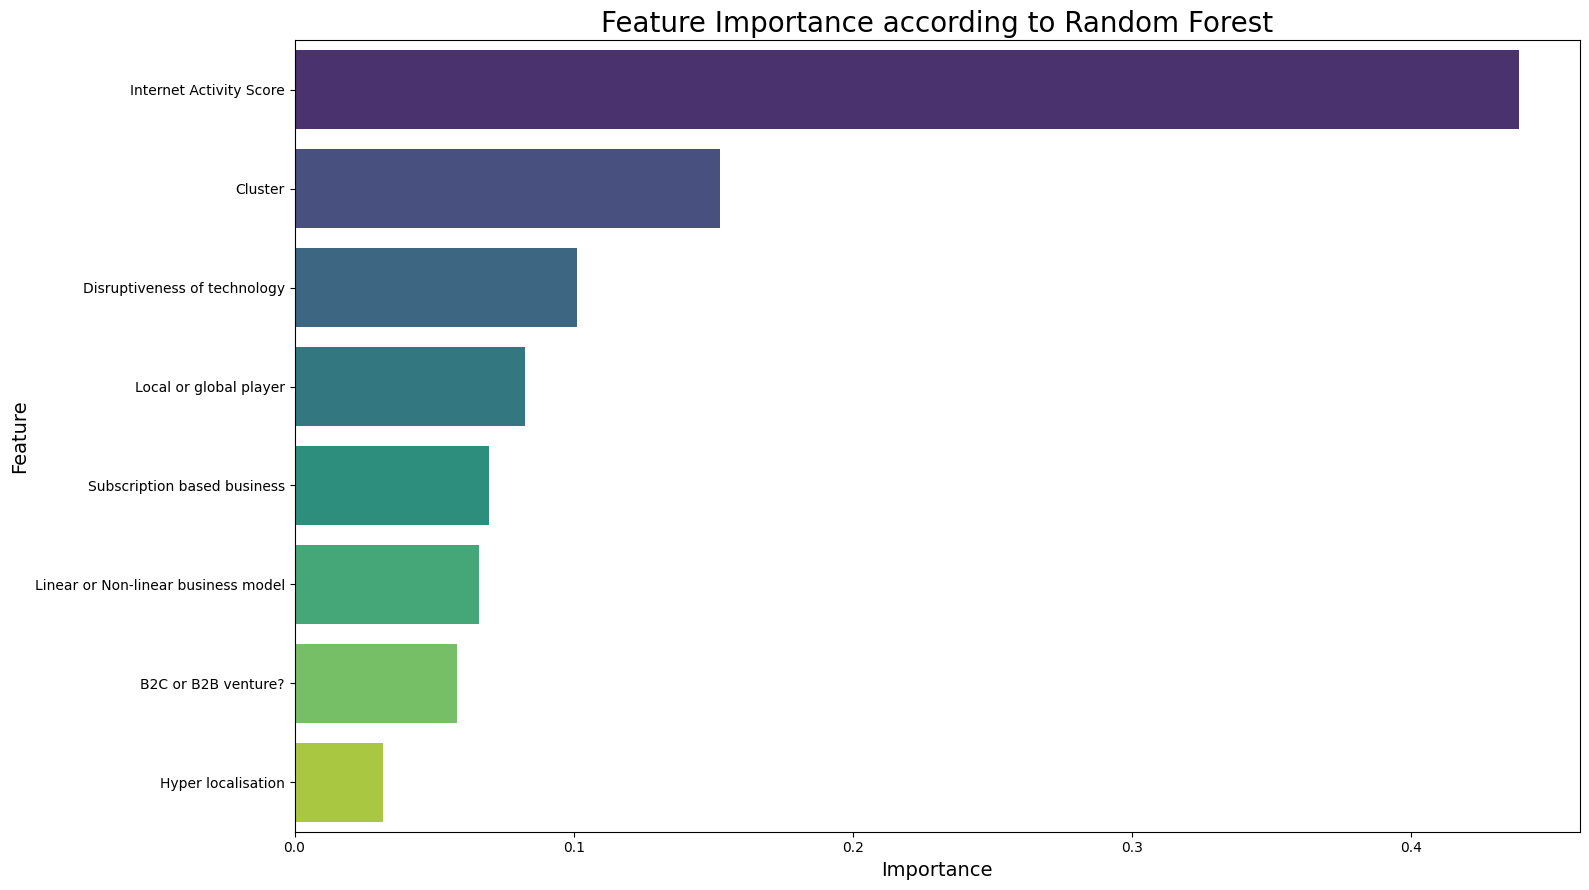

In [390]:
plt.figure(figsize=(16, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importance according to Random Forest', fontsize=20)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

#### Summary
- **Internet Activity Score** is by far the most significant feature and suggests that a company's online presence and activities are quite important for its success/failure. Maybe it could be due to factors such as brand visibility, customer engagement, or digital marketing.

- The cluster assignment from text clustering on the `Focus functions of company` has some importance, so, the categorization of a company's main function(s) based on your NLP processing has some minor predictive power.

- Whether a company operates on a **local** or **global** scale as we can see doesn't have much importance.

- Whether the business model is based on subscriptions seems to have a lower degree of importance. But I believe it is still a relevant factor, because it can relate to the company's revenue stability.

## **2.4 Product and Technology**

In [407]:
product_tech_data = data[[
    'Dependent-Company Status',
    'Product or service company?',
    'Cloud or platform based serive/product?', 
    'Machine Learning based business', 
    'Predictive Analytics business', 
    'Speech analytics business', 
    'Prescriptive analytics business',
    'Big Data Business', 
    'Cross-Channel Analytics/ marketing channels', 
]].copy()

product_tech_data

,Dependent-Company Status,Product or service company?,Cloud or platform based serive/product?,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels
0,Success,Service,Platform,No,No,No,No,No,No
1,Success,Product,Platform,Yes,Yes,No,No,Yes,Yes
2,Success,Both,cloud,No,Yes,No,No,Yes,No
3,Success,Product,Platform,No,No,No,No,No,No
4,Success,Product,Platform,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...
467,Failed,Product,NaN,No,No,No,NaN,No,No
468,Failed,Service,Platform,No,No,No,NaN,No,No
469,Failed,Service,Both,Yes,Yes,No,No,Yes,No
470,Failed,Service,Both,Yes,Yes,No,No,No,No


##### **Encoding binary and multi-category features**

In [408]:
product_tech_data.replace('No Info', pd.NA, inplace=True)
product_tech_data.dropna(inplace=True)
product_tech_data.reset_index(drop=True, inplace=True)


binary_features = [
    'Machine Learning based business', 
    'Predictive Analytics business', 
    'Speech analytics business', 
    'Prescriptive analytics business',
    'Big Data Business', 
    'Cross-Channel Analytics/ marketing channels',
]

label_encoder = LabelEncoder()
for column in binary_features:
    product_tech_data[column] = label_encoder.fit_transform(product_tech_data[column])

multi_category_features = [
    'Product or service company?',
    'Cloud or platform based serive/product?'
]

for column in multi_category_features:
    product_tech_data[column] = product_tech_data[column].str.lower()  # Lowercase the string to ensure uniformity
    product_tech_data[column] = label_encoder.fit_transform(product_tech_data[column])

product_tech_data['Dependent-Company Status'] = label_encoder.fit_transform(product_tech_data['Dependent-Company Status'])

In [409]:
product_tech_data

,Dependent-Company Status,Product or service company?,Cloud or platform based serive/product?,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels
0,1,2,3,0,0,0,0,0,0
1,1,1,3,1,1,0,0,1,1
2,1,0,1,0,1,0,0,1,0
3,1,1,3,0,0,0,0,0,0
4,1,1,3,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
427,0,2,1,0,1,0,1,0,0
428,0,2,3,0,0,0,0,0,0
429,0,2,0,1,1,0,0,1,0
430,0,2,0,1,1,0,0,0,0


##### **ML Workflow**

In [411]:
X = product_tech_data.drop('Dependent-Company Status', axis=1)
y = product_tech_data['Dependent-Company Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Evaluation of {model_name}:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")

    # Compute and print ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    model_performance[model_name] = roc_auc

# Determine the best model based on ROC AUC score
best_model_name = max(model_performance, key=model_performance.get)
print(f"Best model is: {best_model_name} with ROC AUC: {model_performance[best_model_name]}")

Training Decision Tree...
Evaluation of Decision Tree:
              precision    recall  f1-score   support

           0       0.38      0.46      0.41        26
           1       0.75      0.67      0.71        61

    accuracy                           0.61        87
   macro avg       0.56      0.57      0.56        87
weighted avg       0.63      0.61      0.62        87

Accuracy: 0.6091954022988506

ROC AUC Score: 0.5422446406052963
Training Random Forest...
Evaluation of Random Forest:
              precision    recall  f1-score   support

           0       0.45      0.50      0.47        26
           1       0.78      0.74      0.76        61

    accuracy                           0.67        87
   macro avg       0.61      0.62      0.61        87
weighted avg       0.68      0.67      0.67        87

Accuracy: 0.6666666666666666

ROC AUC Score: 0.646279949558638
Training Gradient Boosting...


Evaluation of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        26
           1       0.79      0.75      0.77        61

    accuracy                           0.69        87
   macro avg       0.64      0.65      0.64        87
weighted avg       0.70      0.69      0.69        87

Accuracy: 0.6896551724137931

ROC AUC Score: 0.650063051702396
Best model is: Gradient Boosting with ROC AUC: 0.650063051702396


In [414]:
best_model = models[best_model_name]
feature_importance = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
6,Big Data Business,0.445118
1,Cloud or platform based serive/product?,0.181008
3,Predictive Analytics business,0.138938
7,Cross-Channel Analytics/ marketing channels,0.064368
2,Machine Learning based business,0.061938
5,Prescriptive analytics business,0.050043
0,Product or service company?,0.046870
4,Speech analytics business,0.011717


C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\2740940645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


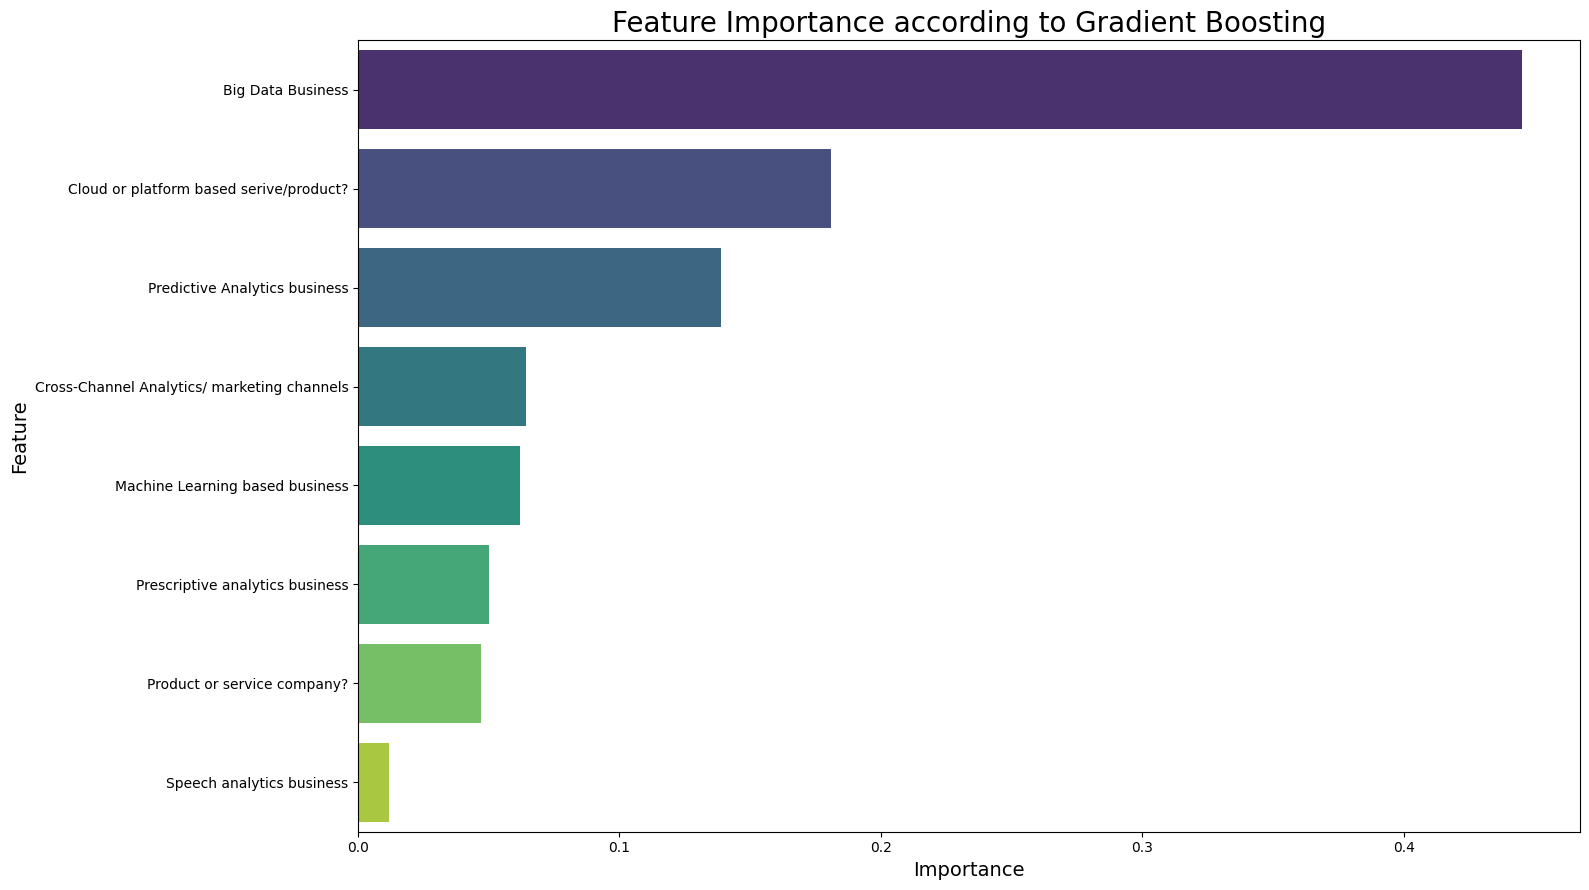

In [415]:
plt.figure(figsize=(16, 9))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importance according to Gradient Boosting', fontsize=20)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

#### Summary
- **Big Data Business** is the most influential feature according to this particular model. Maybe being involved in big data could be a significant predictor of a company's outcome.

- **Cloud or platform based service/product?** also appears to be a good factor but less so than previous. Maybe the presence and usage of cloud computing or platform services may be relevant to a company's operational success.

- Other features like have some minor importance, so these areas may also contribute to the success or failure of a company, but they are less impactful than the previous features.

## **2.5 Operational Efficiency and Model**

In [422]:
operational_data = data[[
    'Dependent-Company Status',
    'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
    'Crowdsourcing based business', 
    'Crowdfunding based business', 
    'Time to market service or product', 
    'Pricing Strategy',
    'Proprietary or patent position (competitive position)', 
    'Cross-Channel Analytics/ marketing channels', 
    'Barriers of entry for the competitors', 
]].copy()

operational_data

,Dependent-Company Status,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Crowdsourcing based business,Crowdfunding based business,Time to market service or product,Pricing Strategy,Proprietary or patent position (competitive position),Cross-Channel Analytics/ marketing channels,Barriers of entry for the competitors
0,Success,Yes,No,No,High,Yes,No,No,Yes
1,Success,No,Yes,No,Low,Yes,Yes,Yes,Yes
2,Success,No,No,No,Low,Yes,Yes,No,Yes
3,Success,No,Yes,No,Low,Yes,Yes,No,Yes
4,Success,Yes,No,No,Low,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
467,Failed,No,No,No,NaN,NaN,NaN,No,Yes
468,Failed,Yes,No,No,NaN,NaN,NaN,No,Yes
469,Failed,No,No,No,NaN,NaN,NaN,No,Yes
470,Failed,No,No,No,NaN,NaN,NaN,No,Yes


In [423]:
operational_data.isnull().sum()

Dependent-Company Status                                                                                                              0
Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive    26
Crowdsourcing based business                                                                                                          5
Crowdfunding based business                                                                                                           5
Time to market service or product                                                                                                    83
Pricing Strategy                                                                                                                     84
Proprietary or patent position (competitive position)                                                                                86
Cross-Channel Analytics/ marketing channels     

##### **Encoding binary and multi-category features**

In [424]:
label_encoder = LabelEncoder()

binary_features = [
    'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
    'Crowdsourcing based business', 
    'Crowdfunding based business',
    'Pricing Strategy',
    'Proprietary or patent position (competitive position)', 
    'Cross-Channel Analytics/ marketing channels',
    'Barriers of entry for the competitors'
]

for column in binary_features:
    operational_data[column] = operational_data[column].replace('No Info', None)
    operational_data[column] = label_encoder.fit_transform(operational_data[column].astype(str))

operational_data['Time to market service or product'] = operational_data['Time to market service or product'].str.lower()  
operational_data['Time to market service or product'] = label_encoder.fit_transform(operational_data['Time to market service or product'])

operational_data['Dependent-Company Status'] = label_encoder.fit_transform(operational_data['Dependent-Company Status'])

operational_data.head()

,Dependent-Company Status,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Crowdsourcing based business,Crowdfunding based business,Time to market service or product,Pricing Strategy,Proprietary or patent position (competitive position),Cross-Channel Analytics/ marketing channels,Barriers of entry for the competitors
0,1,1,0,0,0,1,0,0,1
1,1,0,1,0,1,1,1,1,1
2,1,0,0,0,1,1,1,0,1
3,1,0,1,0,1,1,1,0,1
4,1,1,0,0,1,1,1,0,1


##### **ML Workflow**

In [426]:
X = operational_data.drop('Dependent-Company Status', axis=1)
y = operational_data['Dependent-Company Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Evaluation of {model_name}:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")

    # Compute and print ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    model_performance[model_name] = roc_auc

# Determine the best model based on ROC AUC score
best_model_name = max(model_performance, key=model_performance.get)
print(f"Best model is: {best_model_name} with ROC AUC: {model_performance[best_model_name]}")

Training Decision Tree...
Evaluation of Decision Tree:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        34
           1       0.78      0.80      0.79        61

    accuracy                           0.73        95
   macro avg       0.70      0.70      0.70        95
weighted avg       0.72      0.73      0.72        95

Accuracy: 0.7263157894736842

ROC AUC Score: 0.7311957569913211
Training Random Forest...
Evaluation of Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        34
           1       0.79      0.87      0.83        61

    accuracy                           0.77        95
   macro avg       0.75      0.73      0.74        95
weighted avg       0.76      0.77      0.76        95

Accuracy: 0.7684210526315789

ROC AUC Score: 0.7851976856316297
Training Gradient Boosting...
Evaluation of Gradient Boosting:
              precision    recall  f1-score  

In [427]:
best_model = models[best_model_name]
feature_importance = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
3,Time to market service or product,0.413311
4,Pricing Strategy,0.324416
6,Cross-Channel Analytics/ marketing channels,0.069082
0,"Capital intensive business e.g. e-commerce, En...",0.063691
5,Proprietary or patent position (competitive po...,0.040990
7,Barriers of entry for the competitors,0.034666
2,Crowdfunding based business,0.031276
1,Crowdsourcing based business,0.022569


C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\2740940645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


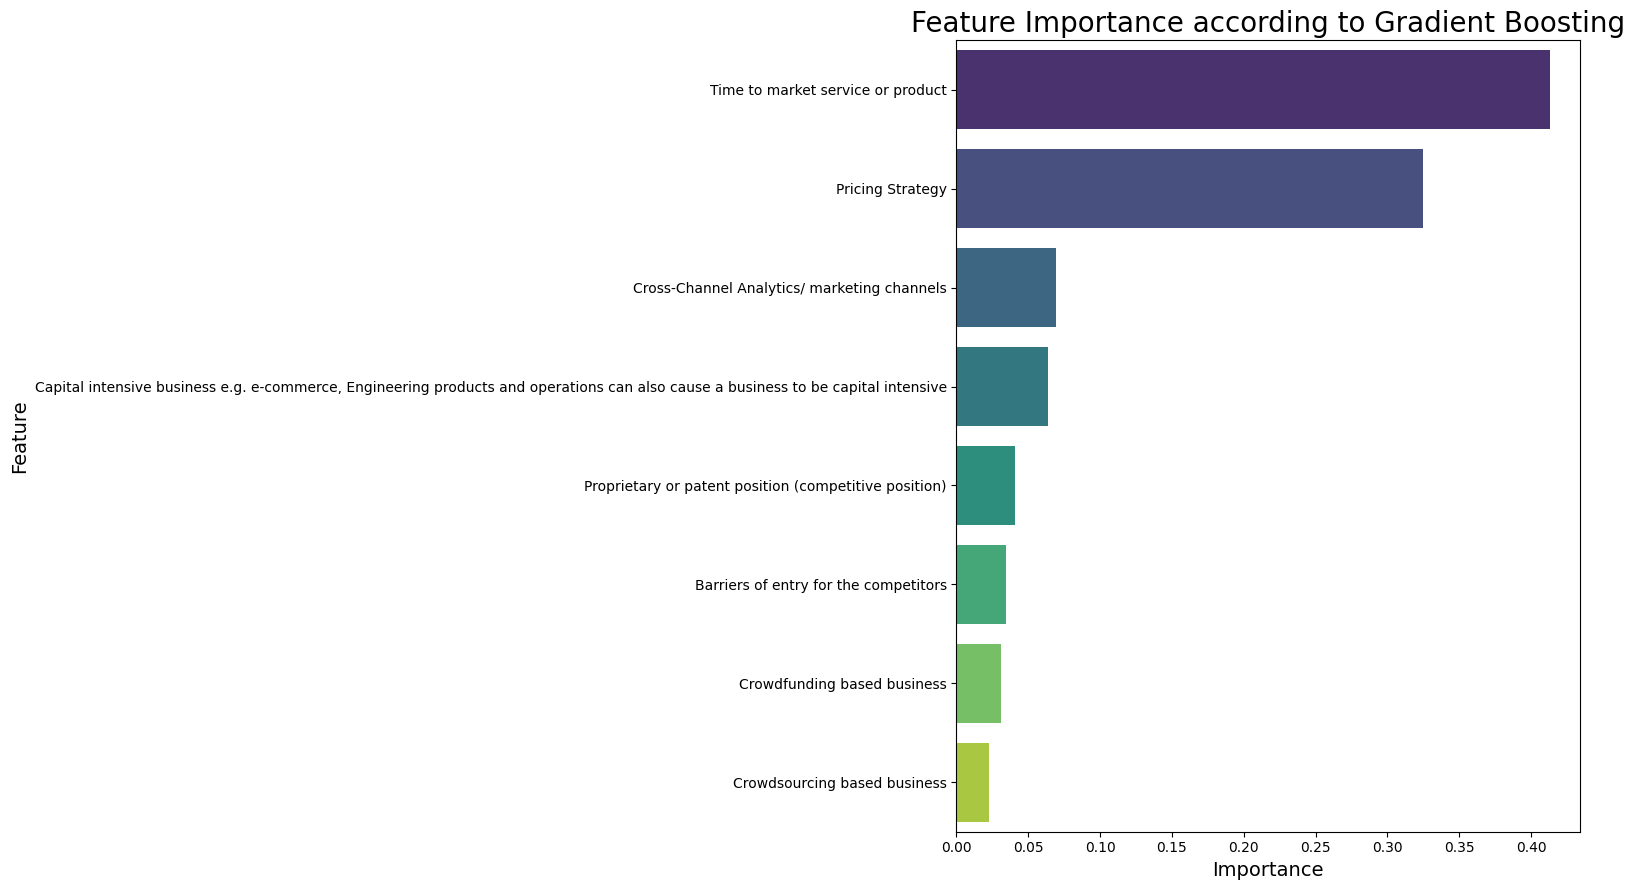

In [428]:
plt.figure(figsize=(16, 9))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importance according to Gradient Boosting', fontsize=20)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

#### Summary
- It can be inferred that **Time to market service or product** is significant predictor of a company's success or failure within the given features and the model. The quickness a company can bring its product or service to market may be a strong indicator of its potential success.

- The **Pricing Strategy** follows as the second most important feature, shows the significance of company prices to its products or services in relation to its success.

- Other features show varying degrees of importance, having less but still some minor influence on the model's predictions.

## **2.6 Founder and Team**

In [509]:
founder_team_data = data[[
    'Dependent-Company Status',
    'Number of Investors in Seed',
    'Number of Investors in Angel and or VC', 
    'Number of Co-founders', 
    'Number of of advisors', 
    'Team size Senior leadership',
    'Team size all employees', 
    'Has the team size grown', 
    'Renown score',
    'Average Years of experience for founder and co founder',
    'Highest education',
    'Years of education',
    'Number of Recognitions for Founders and Co-founders',
    'Worked in top companies',
    'Average size of companies worked for in the past',
    'Have been part of startups in the past?',
    'Was he or she partner in Big 5 consulting?',
    'Consulting experience?',
    'Team Composition score',
]].copy()

founder_team_data.head()

,Dependent-Company Status,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Has the team size grown,Renown score,Average Years of experience for founder and co founder,Highest education,Years of education,Number of Recognitions for Founders and Co-founders,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Team Composition score
0,Success,2,0,1,2,2,15,No,0,High,Masters,21,0,No,Small,No,No,No,Low
1,Success,5,0,2,0,4,20,No,8,High,Masters,21,13,Yes,Large,Yes,No,No,High
2,Success,15,0,3,0,7,10,No,9,Medium,Bachelors,18,18,Yes,Medium,No,No,No,High
3,Success,6,0,2,0,4,50,No,5,Medium,Bachelors,18,2,No,Large,Yes,No,No,Medium
4,Success,7,0,1,1,8,40,No,6,High,Bachelors,18,5,No,Small,No,No,No,Medium


In [510]:
founder_team_data.isnull().sum()

Dependent-Company Status                                    0
Number of Investors in Seed                                49
Number of Investors in Angel and or VC                     49
Number of Co-founders                                       0
Number of of advisors                                       0
Team size Senior leadership                                 0
Team size all employees                                    68
Has the team size grown                                    51
Renown score                                               61
Average Years of experience for founder and co founder     80
Highest education                                         103
Years of education                                        103
Number of Recognitions for Founders and Co-founders        81
Worked in top companies                                    19
Average size of companies worked for in the past           31
Have been part of startups in the past?                    20
Was he o

In [511]:
founder_team_data.replace('No Info', pd.NA, inplace=True)
founder_team_data.dropna(inplace=True)

##### **Encoding binary and multi-category features**

In [512]:
founder_team_data['Has the team size grown'] = founder_team_data['Has the team size grown'].str.lower().replace('no info', pd.NA)

label_encoder = LabelEncoder()
founder_team_data['Has the team size grown'] = label_encoder.fit_transform(founder_team_data['Has the team size grown'].astype(str))
founder_team_data["Worked in top companies"] = label_encoder.fit_transform(founder_team_data["Worked in top companies"].astype(str))
founder_team_data["Have been part of startups in the past?"] = label_encoder.fit_transform(founder_team_data["Have been part of startups in the past?"].astype(str))
founder_team_data["Was he or she partner in Big 5 consulting?"] = label_encoder.fit_transform(founder_team_data["Was he or she partner in Big 5 consulting?"].astype(str))
founder_team_data["Consulting experience?"] = label_encoder.fit_transform(founder_team_data["Consulting experience?"].astype(str))


founder_team_data['Average Years of experience for founder and co founder'] = label_encoder.fit_transform(
    founder_team_data['Average Years of experience for founder and co founder'].astype(str)
)
founder_team_data['Highest education'] = label_encoder.fit_transform(
    founder_team_data['Highest education'].astype(str)
)
founder_team_data["Average size of companies worked for in the past"] = label_encoder.fit_transform(
    founder_team_data["Average size of companies worked for in the past"].astype(str)
)
founder_team_data["Team Composition score"] = label_encoder.fit_transform(
    founder_team_data["Team Composition score"].astype(str)
)

founder_team_data['Dependent-Company Status'] = label_encoder.fit_transform(founder_team_data['Dependent-Company Status'])

In [513]:
founder_team_data.head()

,Dependent-Company Status,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Has the team size grown,Renown score,Average Years of experience for founder and co founder,Highest education,Years of education,Number of Recognitions for Founders and Co-founders,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Team Composition score
0,1,2,0,1,2,2,15,0,0,0,1,21,0,0,2,0,0,0,1
1,1,5,0,2,0,4,20,0,8,0,1,21,13,1,0,1,0,0,0
2,1,15,0,3,0,7,10,0,9,2,0,18,18,1,1,0,0,0,0
3,1,6,0,2,0,4,50,0,5,2,0,18,2,0,0,1,0,0,2
4,1,7,0,1,1,8,40,0,6,0,0,18,5,0,2,0,0,0,2


##### **ML Workflow**

In [514]:
X = founder_team_data.drop('Dependent-Company Status', axis=1)
y = founder_team_data['Dependent-Company Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Evaluation of {model_name}:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}\n")

    # Compute and print ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    model_performance[model_name] = roc_auc

# Determine the best model based on ROC AUC score
best_model_name = max(model_performance, key=model_performance.get)
print(f"Best model is: {best_model_name} with ROC AUC: {model_performance[best_model_name]}")

Training Decision Tree...
Evaluation of Decision Tree:
              precision    recall  f1-score   support

           0       0.28      0.38      0.32        13
           1       0.83      0.75      0.79        53

    accuracy                           0.68        66
   macro avg       0.56      0.57      0.56        66
weighted avg       0.72      0.68      0.70        66

Accuracy: 0.6818181818181818

ROC AUC Score: 0.56966618287373
Training Random Forest...
Evaluation of Random Forest:
              precision    recall  f1-score   support

           0       0.29      0.15      0.20        13
           1       0.81      0.91      0.86        53

    accuracy                           0.76        66
   macro avg       0.55      0.53      0.53        66
weighted avg       0.71      0.76      0.73        66

Accuracy: 0.7575757575757576

ROC AUC Score: 0.6052249637155297
Training Gradient Boosting...
Evaluation of Gradient Boosting:
              precision    recall  f1-score   s

In [515]:
best_model = models[best_model_name]
feature_importance = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
11,Number of Recognitions for Founders and Co-fou...,0.172070
5,Team size all employees,0.139603
4,Team size Senior leadership,0.123604
0,Number of Investors in Seed,0.091419
7,Renown score,0.070470
2,Number of Co-founders,0.069569
1,Number of Investors in Angel and or VC,0.061026
3,Number of of advisors,0.056047
17,Team Composition score,0.055470
16,Consulting experience?,0.050514


C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_4360\2740940645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


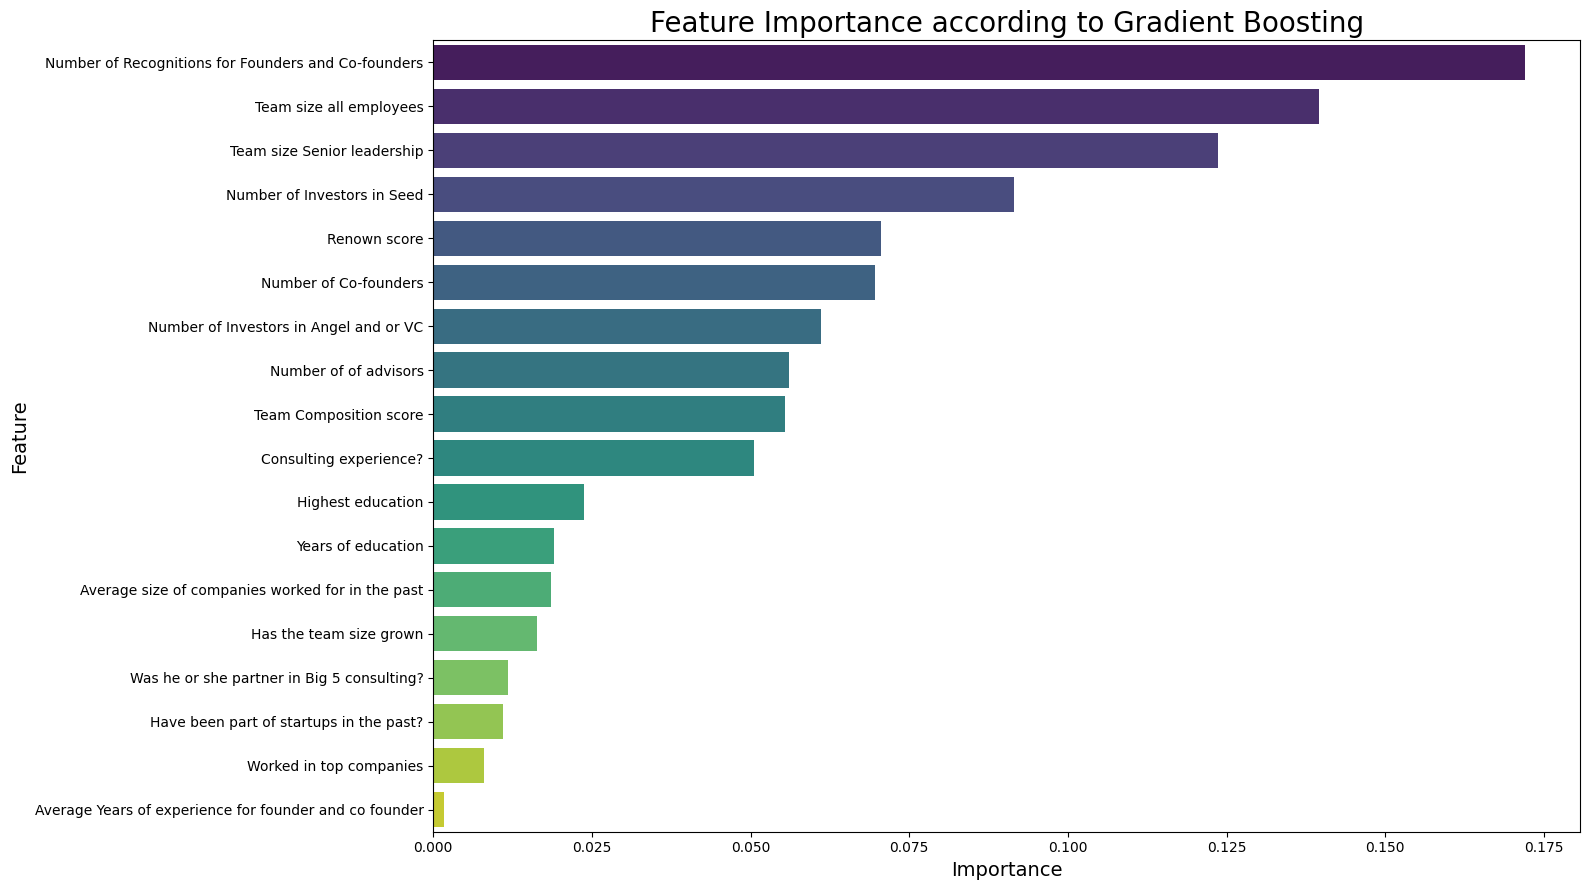

In [517]:
plt.figure(figsize=(16, 9))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importance according to Gradient Boosting', fontsize=20)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

#### Summary
- **Number of Recognitions for Founders and Co-founders** is a significant feature according to this model, maybe companies whose founders and co-founders have received more recognitions are more likely to be classified as successful.

- **Team Size All Employees** indicates that the overall size of the company's team can be considered as one of the predictors of company success, although it's of less importance.

- With **Renown Score**, we can imply that companies with a higher renown score (potentially indicating a well-known or reputable team) have a higher likelihood of success.

- The other features, like team size for senior leadership, number of co-founders, number of investors in seed, etc., almost don't contribute to the model's decision.

# **Ending Note**

#### In this analysis, I looked at startups from different angles to see what makes them succeed or fail. 

#### I found that many things matter: how a startup manages financial part, the strength of its team, the innovation of its technology, and how it stands against competitors. This detailed look, I hope, can possibly help investors know where to put their money, help founders understand what their team needs, and shows companies where they can improve.

#### In short, this analysis is like a guide. It tells people in the startup world what they need to focus on to do well. Success comes from doing many things right, not just one.